In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataset loading and Classifier Initialization

In [ ]:
genre_names = ['blues', 'classical', 'country', 'disco', 'hipop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
centroids = list()

In [ ]:
# Dataset import
data = pd.read_csv('./extracted_dataset.csv')

# Dataset normalization
data_mean = data.mean()
data_std = data.std()

data_normalized = (data - data_mean) / data_std

# Separation between test set and training set
dataset_size = data_normalized.shape[0]
training_count = int(dataset_size * 0.8)


indices = list(range(dataset_size))
np.random.shuffle(indices)

training_indices = indices[0:training_count]
test_indices = indices[training_count:]

# Convert pandas DataFrame to numpy array
data_as_array = data_normalized.to_numpy()

# Training Set
training_set = data_as_array[training_indices, 1:4]
# Training Set labels
training_set_labels = np.array(training_indices) // 100 # Exploiting the initial ordering of the samples


# Test Set
test_set = data_as_array[test_indices, 1:4]
# Test Set labels
test_set_labels = np.array(test_indices) // 100         # Exploiting the initial ordering of the samples

# Centroid computation
centroids = list()
for class_index in range(10):
  # partial_set only contains the sample of a certain class
  partial_set = training_set[training_set_labels == class_index,:]
  # class_centroid contains the mean for each feature
  class_centroid = partial_set.mean(axis=0)
  centroids.append(class_centroid)

# Centroid Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

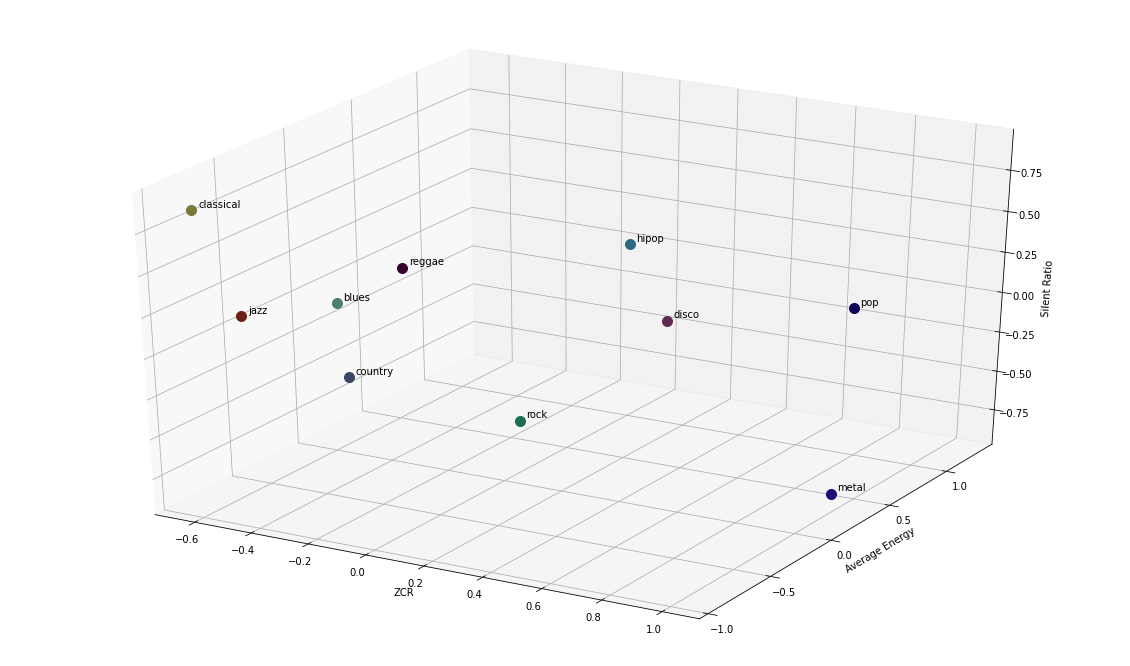

In [ ]:
# Creating a 3d plot
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(projection='3d')

text_offset = 0.05

for i, centroid in enumerate(centroids):
  # Direct color insertion is deprecated, but comes in useful when insertion of color names is untidy
  color_rgb = np.random.rand(3,) * 0.5
  ax.scatter(centroid[0], centroid[1], centroid[2], label = genre_names[i], c=color_rgb, s = 100)
  ax.text(centroid[0], centroid[1] + text_offset, centroid[2], genre_names[i])

ax.set_xlabel('ZCR')
ax.set_ylabel('Average Energy')
ax.set_zlabel('Silent Ratio')

fig.show()

# Classifier

In [ ]:
# Input format (ZCR, AVERAGE_ENERGY, SILENT_RATIO)
def classify(input, genres_to_classify=genre_names, distance=np.linalg.norm, debug_mode=False):
  min_distance = np.infty
  current_closest = ''
  for i, genre in enumerate(genre_names):
    if not genre in genres_to_classify:
      continue

    current_centroid = centroids[i]
    buffer = distance(input - current_centroid)
    if buffer < min_distance:
      min_distance = buffer
      current_closest = genre

    if debug_mode : print('Sample distance from ' + genre + ' is ' + str(buffer))

  return current_closest

Example: classification of sample number 102

In [ ]:
index = 102
real_class = genre_names[index // 100]

test_input = np.array([data_normalized['ZCR'].to_numpy()[index], data_normalized['AVERAGE_ENERGY'].to_numpy()[index], data_normalized['SILENT_RATIO'].to_numpy()[index]])
print("classified as " + classify(test_input) + " should be " + real_class)

classified as country should be classical


To see why the sample was classified in this way, let's look again at the scatterplot...

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

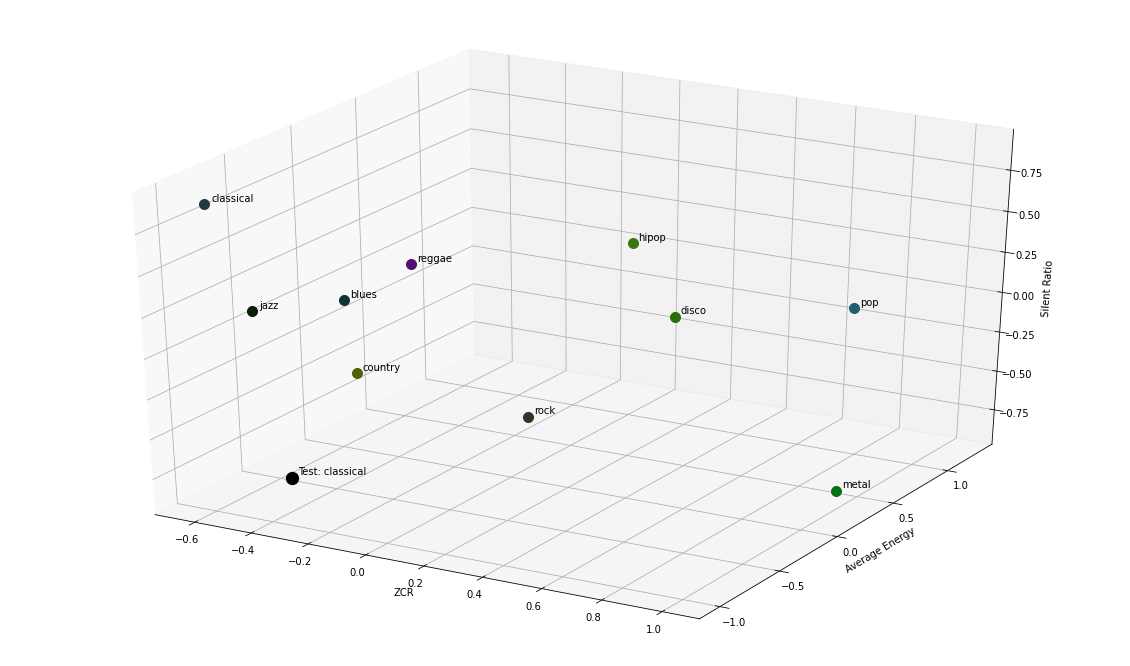

In [ ]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(projection='3d')

text_offset = 0.05

for i, centroid in enumerate(centroids):
  color_rgb = np.random.rand(3,) * 0.5
  ax.scatter(centroid[0], centroid[1], centroid[2], label = genre_names[i], c=color_rgb, s = 100)
  ax.text(centroid[0], centroid[1] + text_offset, centroid[2], genre_names[i])

ax.scatter(test_input[0], test_input[1], test_input[2], color = 'black', s=150)
ax.text(test_input[0], test_input[1] + text_offset, test_input[2], 'Test: ' + real_class)

ax.set_xlabel('ZCR')
ax.set_ylabel('Average Energy')
ax.set_zlabel('Silent Ratio')

fig.show()

### Classifier performance:
Confusion Matrix (with all 10 genres) and euclidean distance

In [ ]:
confusion_matrix = np.zeros((10, 10))

# Size of the test set
test_count = test_set.shape[0]

# For each test sample
for test_index in range(test_count):
  # True label (index form)
  true_class_index = test_set_labels[test_index]
  # True label (string form)
  true_class = genre_names[true_class_index]

  # Predict
  input_vector = test_set[test_index,:]
  predicted = classify(input_vector)

  # Prediction (index form)
  predicted_index = genre_names.index(predicted)

  # Add result to confusion matrix
  confusion_matrix[true_class_index, predicted_index] += 1

In [ ]:
print(confusion_matrix)

[[ 4.  6.  3.  1.  1.  1.  1.  1.  1.  3.]
 [ 0.  9.  1.  1.  0.  3.  0.  0.  0.  1.]
 [ 0.  2.  7.  0.  0.  2.  1.  0.  0.  4.]
 [ 1.  2.  0.  5.  0.  0.  9.  2.  1.  2.]
 [ 1.  1.  1.  2.  6.  1.  2.  4.  0.  2.]
 [ 0.  6.  4.  2.  0.  7.  1.  0.  0.  0.]
 [ 0.  0.  1.  4.  0.  0. 12.  2.  1.  3.]
 [ 1.  2.  0.  4.  0.  0.  2.  8.  2.  0.]
 [ 2.  2.  6.  0.  2.  5.  0.  2.  3.  1.]
 [ 2.  1.  3.  2.  0.  1.  5.  0.  2.  4.]]


In [ ]:
accuracy = confusion_matrix.trace() / confusion_matrix.sum()
print('Accuracy is %1.2f%%' % (accuracy * 100.0))

Accuracy is 32.50%


### Classifier performance:
Confusion Matrix (with all 2 genres) and euclidean distance

In [ ]:
input_genres = ['classical', 'pop']

# Number of genres to classify
genre_count = len(input_genres)

# Indices of genres to classify
genre_indices = list()
for genre_n in input_genres: genre_indices.append(genre_names.index(genre_n))

# Confusion matrix init
confusion_matrix = np.zeros((genre_count,genre_count))

# Filter to only select samples from the input genres
test_set_filter = np.zeros(test_set.shape[0], dtype='bool')
for j in range(test_set.shape[0]):
  test_set_filter[j] = test_set_labels[j] in genre_indices

# Application of filter on the test set
partial_test_set = test_set[test_set_filter,:]
partial_test_labels = test_set_labels[test_set_filter]
partial_test_count = partial_test_set.shape[0]

# For each sample of the partial test set
for test_index in range(partial_test_count):
  true_class_index = partial_test_labels[test_index]
  true_class = genre_names[true_class_index]

  # Predict
  input_vector = partial_test_set[test_index,:]
  predicted = classify(input_vector, genres_to_classify = input_genres)

  # Prediction (index form)
  predicted_index = input_genres.index(predicted)

  # Add result to confusion matrix
  confusion_matrix[genre_indices.index(true_class_index), predicted_index] += 1

In [ ]:
print(confusion_matrix)

[[14.  1.]
 [ 5. 14.]]


In [ ]:
accuracy = confusion_matrix.trace() / confusion_matrix.sum()
print('Accuracy is %1.2f%%' % (accuracy * 100.0))

Accuracy is 82.35%


### Classifier performance:
Confusion Matrix (with all 6 genres) and euclidean distance

In [ ]:
input_genres = ['blues', 'classical', 'country', 'disco', 'pop', 'rock']

# Number of genres to classify
genre_count = len(input_genres)

# Indices of genres to classify
genre_indices = list()
for genre_n in input_genres: genre_indices.append(genre_names.index(genre_n))

# Confusion matrix init
confusion_matrix = np.zeros((genre_count,genre_count))

# Filter to only select samples from the input genres
test_set_filter = np.zeros(test_set.shape[0], dtype='bool')
for j in range(test_set.shape[0]):
  test_set_filter[j] = test_set_labels[j] in genre_indices

# Application of filter on the test set
partial_test_set = test_set[test_set_filter,:]
partial_test_labels = test_set_labels[test_set_filter]
partial_test_count = partial_test_set.shape[0]

# For each sample of the partial test set
for test_index in range(partial_test_count):
  true_class_index = partial_test_labels[test_index]
  true_class = genre_names[true_class_index]

  # Predict
  input_vector = partial_test_set[test_index,:]
  predicted = classify(input_vector, genres_to_classify = input_genres)

  # Prediction (index form)
  predicted_index = input_genres.index(predicted)

  # Add result to confusion matrix
  confusion_matrix[genre_indices.index(true_class_index), predicted_index] += 1

In [ ]:
print(confusion_matrix)

[[ 6.  6.  3.  1.  2.  4.]
 [ 0. 11.  2.  1.  0.  1.]
 [ 0.  3.  8.  0.  0.  5.]
 [ 1.  2.  0.  7.  7.  5.]
 [ 1.  2.  0.  6.  8.  2.]
 [ 2.  3.  3.  4.  1.  7.]]


In [ ]:
accuracy = confusion_matrix.trace() / confusion_matrix.sum()
print('Accuracy is %1.2f%%' % (accuracy * 100.0))

Accuracy is 41.23%


# Other distance functions
### Manhattan Distance
$d(x,y)=\sum_i{|x_i-y_i|}$

In [ ]:
# Assumption (x already contains the difference between the label and the prediction)
def manhattan(x):
  return np.abs(x).sum()

Performance of classifier with all 10 genres and manhattan distance

In [ ]:
confusion_matrix = np.zeros((10, 10))

# Size of the test set
test_count = test_set.shape[0]

# For each test sample
for test_index in range(test_count):
  # True label (index form)
  true_class_index = test_set_labels[test_index]
  # True label (string form)
  true_class = genre_names[true_class_index]

  # Predict
  input_vector = test_set[test_index,:]
  predicted = classify(input_vector, distance=manhattan)

  # Prediction (index form)
  predicted_index = genre_names.index(predicted)

  # Add result to confusion matrix
  confusion_matrix[true_class_index, predicted_index] += 1

In [ ]:
print(confusion_matrix)

[[ 4.  6.  4.  1.  1.  0.  1.  1.  1.  3.]
 [ 0.  9.  1.  1.  0.  2.  0.  0.  1.  1.]
 [ 0.  2.  6.  0.  1.  3.  0.  0.  0.  4.]
 [ 0.  2.  0.  6.  2.  0.  7.  2.  1.  2.]
 [ 0.  1.  2.  3.  5.  1.  3.  4.  0.  1.]
 [ 0.  5.  3.  2.  0.  8.  1.  0.  1.  0.]
 [ 0.  0.  1.  4.  1.  0. 10.  1.  1.  5.]
 [ 1.  2.  0.  3.  1.  0.  1.  8.  2.  1.]
 [ 2.  2.  6.  0.  2.  5.  0.  2.  3.  1.]
 [ 2.  1.  3.  2.  0.  1.  4.  1.  2.  4.]]


In [ ]:
accuracy = confusion_matrix.trace() / confusion_matrix.sum()
print('Accuracy is %1.2f%%' % (accuracy * 100.0))

Accuracy is 31.50%


Performance of classifier with 2 genres and manhattan distance

In [ ]:
input_genres = ['classical', 'pop']

# Number of genres to classify
genre_count = len(input_genres)

# Indices of genres to classify
genre_indices = list()
for genre_n in input_genres: genre_indices.append(genre_names.index(genre_n))

# Confusion matrix init
confusion_matrix = np.zeros((genre_count,genre_count))

# Filter to only select samples from the input genres
test_set_filter = np.zeros(test_set.shape[0], dtype='bool')
for j in range(test_set.shape[0]):
  test_set_filter[j] = test_set_labels[j] in genre_indices

# Application of filter on the test set
partial_test_set = test_set[test_set_filter,:]
partial_test_labels = test_set_labels[test_set_filter]
partial_test_count = partial_test_set.shape[0]

# For each sample of the partial test set
for test_index in range(partial_test_count):
  true_class_index = partial_test_labels[test_index]
  true_class = genre_names[true_class_index]

  # Predict
  input_vector = partial_test_set[test_index,:]
  predicted = classify(input_vector, genres_to_classify = input_genres, distance=manhattan)

  # Prediction (index form)
  predicted_index = input_genres.index(predicted)

  # Add result to confusion matrix
  confusion_matrix[genre_indices.index(true_class_index), predicted_index] += 1

In [ ]:
print(confusion_matrix)

[[14.  1.]
 [ 4. 15.]]


In [ ]:
accuracy = confusion_matrix.trace() / confusion_matrix.sum()
print('Accuracy is %1.2f%%' % (accuracy * 100.0))

### Chebyshev Distance
$d(x,y)=\max_i{|x_i-y_i|}$

In [ ]:
# Assumption (x already contains the difference between the label and the prediction)
def chebyshev(x):
  return np.max(np.abs(x))

Performance of classifier with all 10 genres and Chebyshev distance

In [ ]:
confusion_matrix = np.zeros((10, 10))

# Size of the test set
test_count = test_set.shape[0]

# For each test sample
for test_index in range(test_count):
  # True label (index form)
  true_class_index = test_set_labels[test_index]
  # True label (string form)
  true_class = genre_names[true_class_index]

  # Predict
  input_vector = test_set[test_index,:]
  predicted = classify(input_vector, distance=chebyshev)

  # Prediction (index form)
  predicted_index = genre_names.index(predicted)

  # Add result to confusion matrix
  confusion_matrix[true_class_index, predicted_index] += 1

In [ ]:
print(confusion_matrix)

[[ 1.  6.  3.  1.  1.  3.  1.  1.  2.  3.]
 [ 0.  9.  0.  1.  0.  4.  1.  0.  0.  0.]
 [ 1.  2.  4.  0.  0.  3.  1.  0.  0.  5.]
 [ 1.  3.  0.  2.  0.  0.  9.  2.  3.  2.]
 [ 0.  1.  2.  1.  5.  1.  2.  6.  1.  1.]
 [ 1.  7.  3.  2.  0.  5.  1.  0.  0.  1.]
 [ 0.  0.  1.  3.  0.  0. 13.  2.  1.  3.]
 [ 1.  2.  0.  2.  1.  0.  2.  8.  2.  1.]
 [ 3.  1.  5.  0.  2.  5.  0.  2.  3.  2.]
 [ 0.  0.  2.  2.  1.  2.  3.  0.  4.  6.]]


In [ ]:
accuracy = confusion_matrix.trace() / confusion_matrix.sum()
print('Accuracy is %1.2f%%' % (accuracy * 100.0))

Accuracy is 28.00%


Performance of classifier with 2 genres and Chebyshev distance

In [ ]:
input_genres = ['classical', 'pop']

# Number of genres to classify
genre_count = len(input_genres)

# Indices of genres to classify
genre_indices = list()
for genre_n in input_genres: genre_indices.append(genre_names.index(genre_n))

# Confusion matrix init
confusion_matrix = np.zeros((genre_count,genre_count))

# Filter to only select samples from the input genres
test_set_filter = np.zeros(test_set.shape[0], dtype='bool')
for j in range(test_set.shape[0]):
  test_set_filter[j] = test_set_labels[j] in genre_indices

# Application of filter on the test set
partial_test_set = test_set[test_set_filter,:]
partial_test_labels = test_set_labels[test_set_filter]
partial_test_count = partial_test_set.shape[0]

# For each sample of the partial test set
for test_index in range(partial_test_count):
  true_class_index = partial_test_labels[test_index]
  true_class = genre_names[true_class_index]

  # Predict
  input_vector = partial_test_set[test_index,:]
  predicted = classify(input_vector, genres_to_classify = input_genres, distance=chebyshev)

  # Prediction (index form)
  predicted_index = input_genres.index(predicted)

  # Add result to confusion matrix
  confusion_matrix[genre_indices.index(true_class_index), predicted_index] += 1

In [ ]:
print(confusion_matrix)

[[14.  1.]
 [ 6. 13.]]


In [ ]:
accuracy = confusion_matrix.trace() / confusion_matrix.sum()
print('Accuracy is %1.2f%%' % (accuracy * 100.0))

Accuracy is 79.41%
